In [1]:
#імпорт необхідних бібліотек
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Asus\Anaconda3\envs\machine_learning\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


train_images original shape (50000, 32, 32, 3)
train_labels original shape (50000, 1)


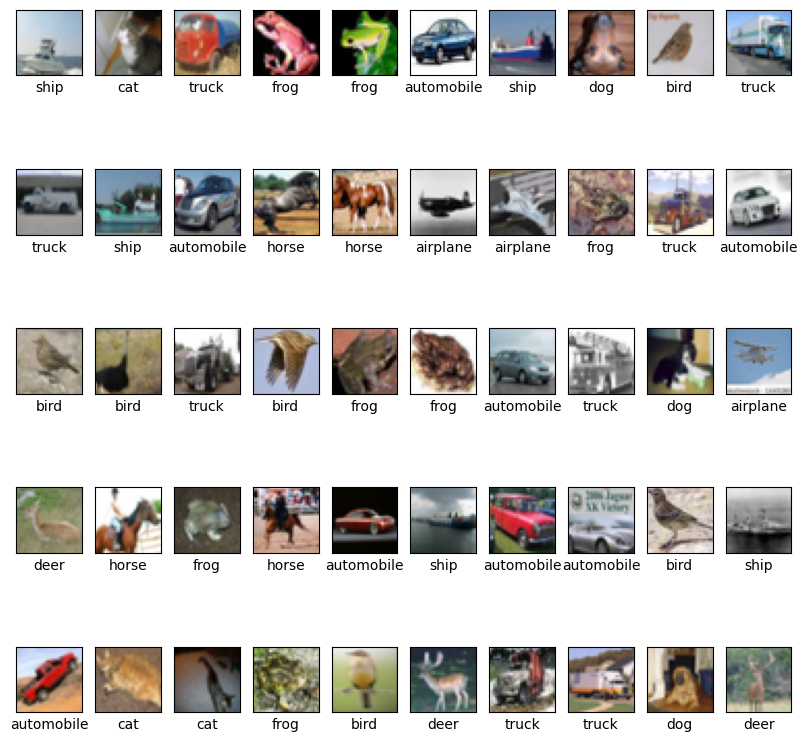

In [11]:
# Завантаження та підготовка датасету CIFAR-10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print("train_images original shape", train_images.shape)
print("train_labels original shape", train_labels.shape)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(classes[train_labels[i][0]])

In [12]:
# Нормалізація даних
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Перетворення міток в категоріальні дані
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [13]:
# Будівництво моделі
model = models.Sequential()
model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Компіляція моделі
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Виведення структури моделі
model.summary()

# Тренування моделі
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 3805450 (14.52 MB)
Trainable params: 3805450 (14.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5


15

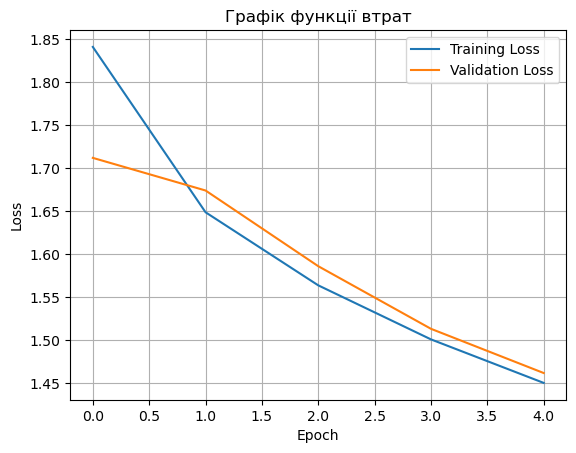

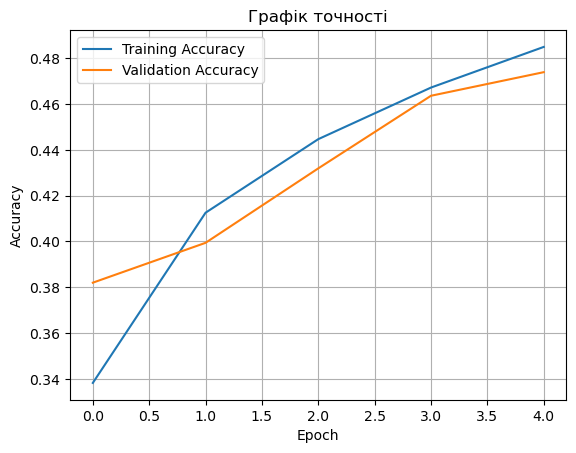

In [14]:
# Виведення графіків функції втрат та точності
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Графік функції втрат")
plt.legend()
plt.grid()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Графік точності")
plt.grid()
plt.legend()
plt.show()

313/313 - 1s - loss: 1.4618 - accuracy: 0.4739 - 963ms/epoch - 3ms/step

Test Accuracy: 47.39%
1/1 [==============================] - 0s 86ms/step
Image 1: Predicted Class 2, True Class 0
Image 2: Predicted Class 1, True Class 1
Image 3: Predicted Class 1, True Class 1
Image 4: Predicted Class 6, True Class 6
Image 5: Predicted Class 6, True Class 3
Image 6: Predicted Class 1, True Class 9
Image 7: Predicted Class 3, True Class 3
Image 8: Predicted Class 8, True Class 8
Image 9: Predicted Class 7, True Class 7
Image 10: Predicted Class 9, True Class 9


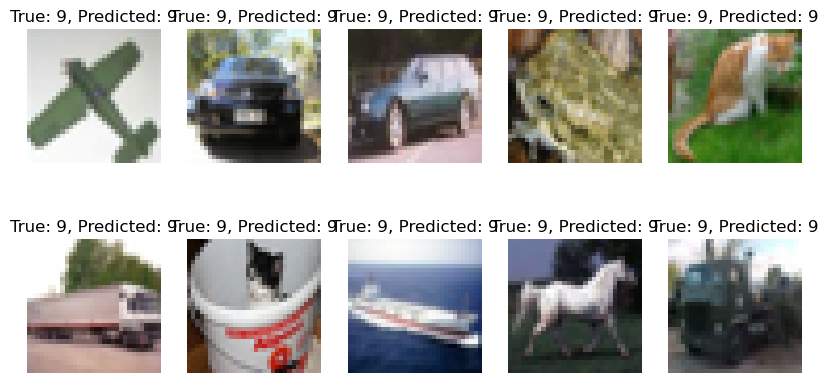

In [15]:
# Оцінка точності на тестовому наборі
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest Accuracy: {test_accuracy*100:.2f}%")

# Розпізнавання 10 випадкових зображень
random_indices = np.random.choice(test_images.shape[0], 10, replace=False)
random_images = test_images[random_indices]
predictions = model.predict(random_images)

# Виведення результатів розпізнавання
for i in range(10):
    predicted_class = np.argmax(predictions[i])
    true_class = np.argmax(test_labels[random_indices[i]])
    print(f"Image {i + 1}: Predicted Class {predicted_class}, True Class {true_class}")

# Виведення зображень для перевірки
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(random_images[i], cmap='gray')
    plt.title(f"True: {true_class}, Predicted: {predicted_class}")
    plt.axis('off')
plt.show()

In [16]:
# Виведення статистики моделі
print("\nModel Evaluation:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Статистика параметрів моделі
total_parameters = sum([np.prod(layer.get_weights()[i].shape) for layer in model.layers for i in range(len(layer.get_weights()))])

print(f"\nTotal Parameters: {total_parameters}")

# Статистика шарів моделі
for i, layer in enumerate(model.layers):
    print(f"\nLayer {i + 1}: {layer.name}")
    print(f"Number of Parameters: {layer.count_params()}")
    print(f"Input Shape: {layer.input_shape}, Output Shape: {layer.output_shape}")



Model Evaluation:
Test Loss: 1.4618
Test Accuracy: 47.39%

Total Parameters: 3805450

Layer 1: flatten
Number of Parameters: 0
Input Shape: (None, 32, 32, 3), Output Shape: (None, 3072)

Layer 2: dense
Number of Parameters: 3146752
Input Shape: (None, 3072), Output Shape: (None, 1024)

Layer 3: dense_1
Number of Parameters: 524800
Input Shape: (None, 1024), Output Shape: (None, 512)

Layer 4: dense_2
Number of Parameters: 131328
Input Shape: (None, 512), Output Shape: (None, 256)

Layer 5: dense_3
Number of Parameters: 2570
Input Shape: (None, 256), Output Shape: (None, 10)
